## Credit Card Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.shape

(284807, 31)

In [47]:
###Let's check pur dataset contains any null values or not
df.isnull().values.any()

False

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Histogram
It will show all the numrical columns distribution

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


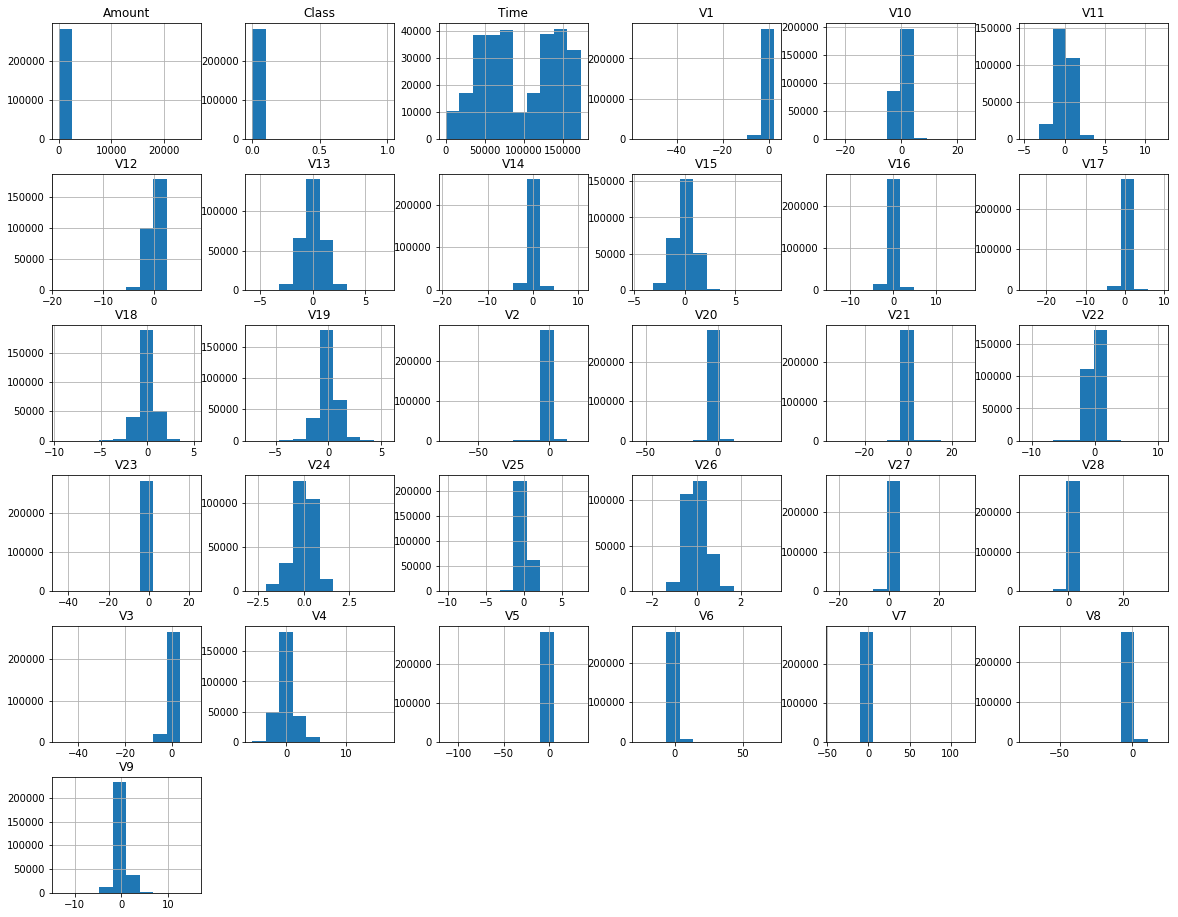

In [8]:
fig = plt.figure(figsize = (20,16))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

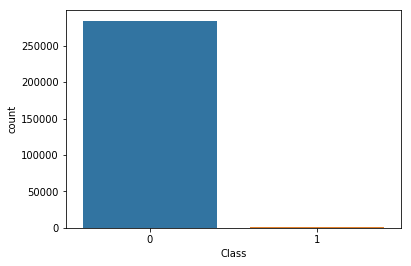

In [10]:
sns.countplot(x=df.Class)

### Class Imbalanced problem
Only 465 records are fraud transactions an remaining are non fraud transactions

Lets check the ration of fraud transaction on dataset

In [11]:
print("Fraud Transaction "+str(round((len(df[df['Class']==1])/df.shape[0]),4))+ "%")

Fraud Transaction 0.0017%


In [12]:
#Less than 1%...
##Remove all the transcations less than or equal to 0

df[df['Amount']==0]['Amount'].count()
df=df[~(df['Amount']<=0)]

In [49]:
df['Amount'].describe()

count    282982.000000
mean         88.919401
std         250.824374
min           0.010000
25%           5.990000
50%          22.490000
75%          78.000000
max       25691.160000
Name: Amount, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


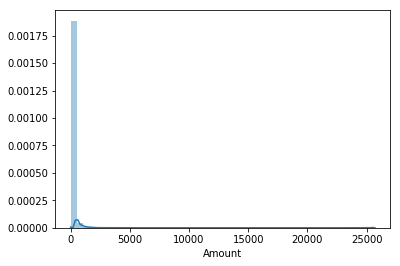

In [48]:
sns.distplot(df['Amount'])

In [15]:
fraud=df[df.Class==1]
non_fraud=df[df.Class==0]

In [16]:
print(fraud['Amount'].describe())
print(non_fraud['Amount'].describe())

count     465.000000
mean      129.307462
std       262.298781
min         0.010000
25%         1.000000
50%        17.060000
75%       111.700000
max      2125.870000
Name: Amount, dtype: float64
count    282517.000000
mean         88.852926
std         250.800179
min           0.010000
25%           5.990000
50%          22.490000
75%          78.000000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Non Fraud Transaction')

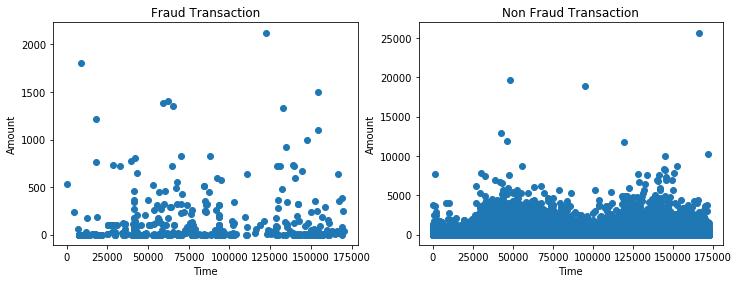

In [17]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.scatter(x=fraud['Time'],y=fraud['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Fraud Transaction')

plt.subplot(2,2,2)
plt.scatter(x=non_fraud['Time'],y=non_fraud['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Non Fraud Transaction')

In [18]:
non_fraud=non_fraud[~(non_fraud['Amount']>10000)]
fraud=fraud[~(fraud['Amount']>1000)]

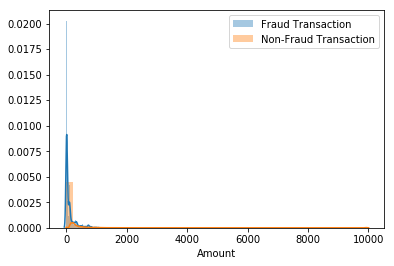

In [19]:
sns.distplot(fraud['Amount'])
sns.distplot(non_fraud['Amount'])
plt.legend(['Fraud Transaction','Non-Fraud Transaction'])

### Resampling Techniques
We will apply the both over sampling and under sampling techniques.

The reason for over sampling is that we only have 400 records of fraud transactions where non_fraud transactions are more than 2 lakhs.When we train our model on full data 99% the model will predict it is non_fraud transactions.So our approach is to increase the fraud transactions data and radnomly select small set of non_fraud transactions data. Using this approach it will boost the model efficiency

We will double the fraud transaction data and we will only use 14K records of non_fraud transactions

In [20]:
df_new=non_fraud.sample(frac=0.03)
fraud=pd.concat([fraud,fraud])
df_new=pd.concat([df_new,fraud])
df_new.shape

(9387, 31)

In [21]:
df_new['Amount'].describe()

count    9387.000000
mean       92.475298
std       256.846223
min         0.010000
25%         4.795000
50%        21.580000
75%        80.000000
max      6998.000000
Name: Amount, dtype: float64

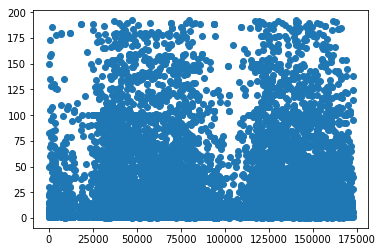

In [27]:
plt.scatter(x=df_new['Time'],y=df_new['Amount'])

### Outlier Remove

In [23]:
Q1=df_new['Amount'].quantile(0.25)
Q3=df_new['Amount'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
#d=df_new[((df_new['Amount']<(Q1-1.5*IQR)) | (df_new['Amount']>(Q3+1.5*IQR)))]

4.795
80.0
75.205


In [24]:
df_new=df_new[~((df_new['Amount']<(Q1-1.5*IQR)) | (df_new['Amount']>(Q3+1.5*IQR)))]

### Let's Apply Log Transformation
If wee see the amount column distribution the data are very skewed to the left side Using log function we can skewed it to the normal distibution

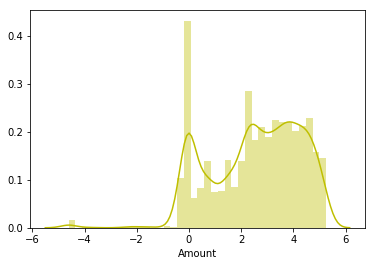

In [28]:
sns.distplot(np.log(df_new['Amount']),color='y')

In [29]:
df_new['Amount']=np.log(df_new['Amount'])

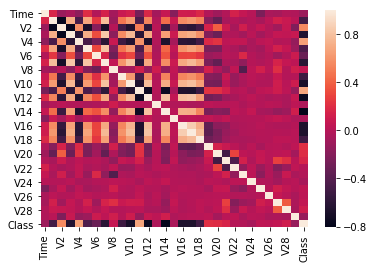

In [30]:
sns.heatmap(df_new.corr())

###### In Correlation Heatmap we can see Time attribute is not much importants So lets Drop It.

In [31]:
df_new=df_new.drop("Time",axis=1)

df_new.Class.head(5)

33561     0
277924    0
139908    0
107910    0
207579    0
Name: Class, dtype: int64

###### We can see our data is arrange in linearly fashion.

###### Let's shuffle the data randomly it will boost the accuracy of our model otherwish model will understand that data are in linerly order

In [32]:
df_new=df_new.sample(frac=1)

In [33]:
##Extract features and Class attribute

X=df_new.drop('Class',axis=1)
y=df_new.Class

#### Train Test Split
We will use 20% data for testing purpose remaining for training

In [34]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=45)

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))

0.9939975990396158
[[1542    4]
 [   6  114]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression work great the accuracy is around 95% and the confusion matrix also show that the number of True negative and True positive are higher.

We need to perfrom the K-Fold cross validation which will show how our model give accuracy over different folds.

#### K-Fold Cross Validation of Logistic Regression Algorithm

In [40]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def acc(y_true, y_pred): return round(accuracy_score(y_true, y_pred),3)

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),'accuracy': make_scorer(acc)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])
    print("Accuracy : ",result['test_accuracy'])
    
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

TP:  [56 58 54 52 58 54 58 59 55 55]
TN:  [603 600 603 596 600 602 601 601 601 601]
FN:  [ 8  6 10 12  6 10  6  5  8  8]
FP:  [0 3 0 6 2 0 1 1 1 1]
Accuracy :  [0.988 0.987 0.985 0.973 0.988 0.985 0.989 0.991 0.986 0.986]


#### Support Vector Classifier

In [44]:
from sklearn.svm import SVC

clf=SVC(gamma='auto')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))

0.9945978391356542
[[1543    3]
 [   6  114]]


We got the 99% accuracy with the Support Vector Classifier which is great...SVC worked better than the logistic regression and improved.

We need to perfrom the K-Fold cross validation which will show how our model give accuracy over different folds.

#### K-Fold Cross Validation of SVC Algorithm

In [46]:
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

TP:  [56 59 56 53 58 56 59 59 55 56]
TN:  [602 603 603 598 601 601 601 602 602 602]
FN:  [ 8  5  8 11  6  8  5  5  8  7]
FP:  [1 0 0 4 1 1 1 0 0 0]
Accuracy :  [0.987 0.993 0.988 0.977 0.989 0.986 0.991 0.992 0.988 0.989]


We can see that each fold accuracy is around 98%

That's mean our model is not overfitting and working fine